# Impoart

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import bbox_visualizer as bbv


from VOC2012_MaskRCNN_InstanceSegmentation import *
from torch.nn.parallel import DistributedDataParallel as DDP

In [65]:
device = 7

In [66]:
t_dataset, t_dataloader, v_dataset, v_dataloader = Task.get_dataset_and_loader(3, shuffle = False)
images, targets = next(iter(v_dataloader))

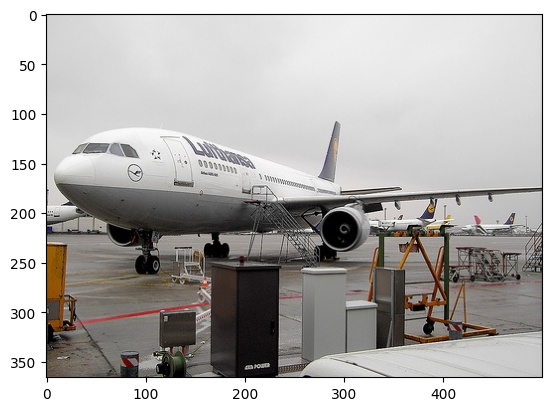

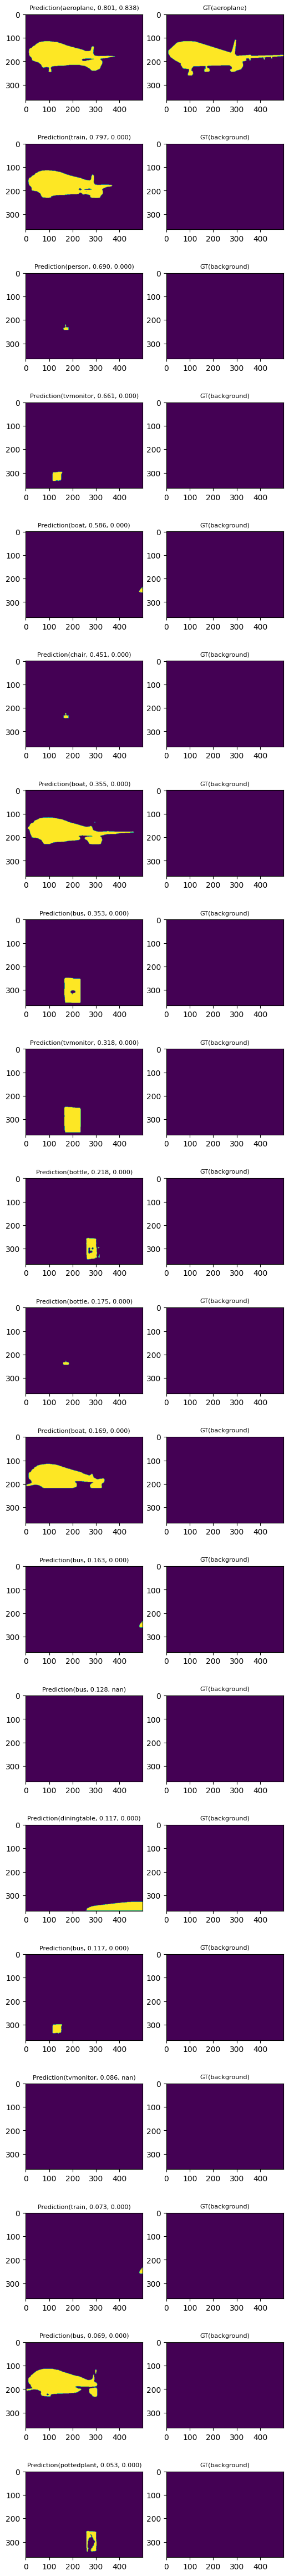

In [76]:
dataset = v_dataset
model = Task.get_model("./result/benchmark/checkpoint(30)")
sample = dataset[0]
plt.imshow(Converter.tensor_to_numpy_for_image(sample[0]))
Task.show_comparison_for_one_sample(model, sample, device, iou_threshold=0.5, mask_binary_threshold=0.5)

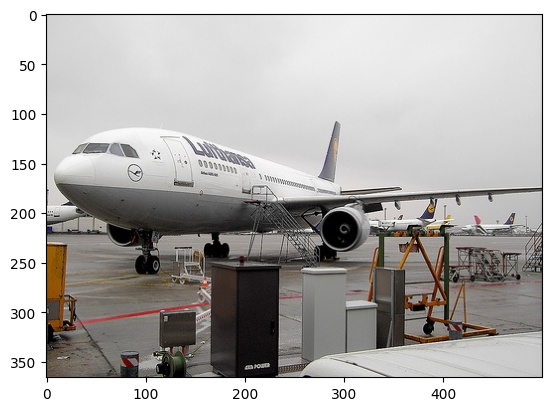

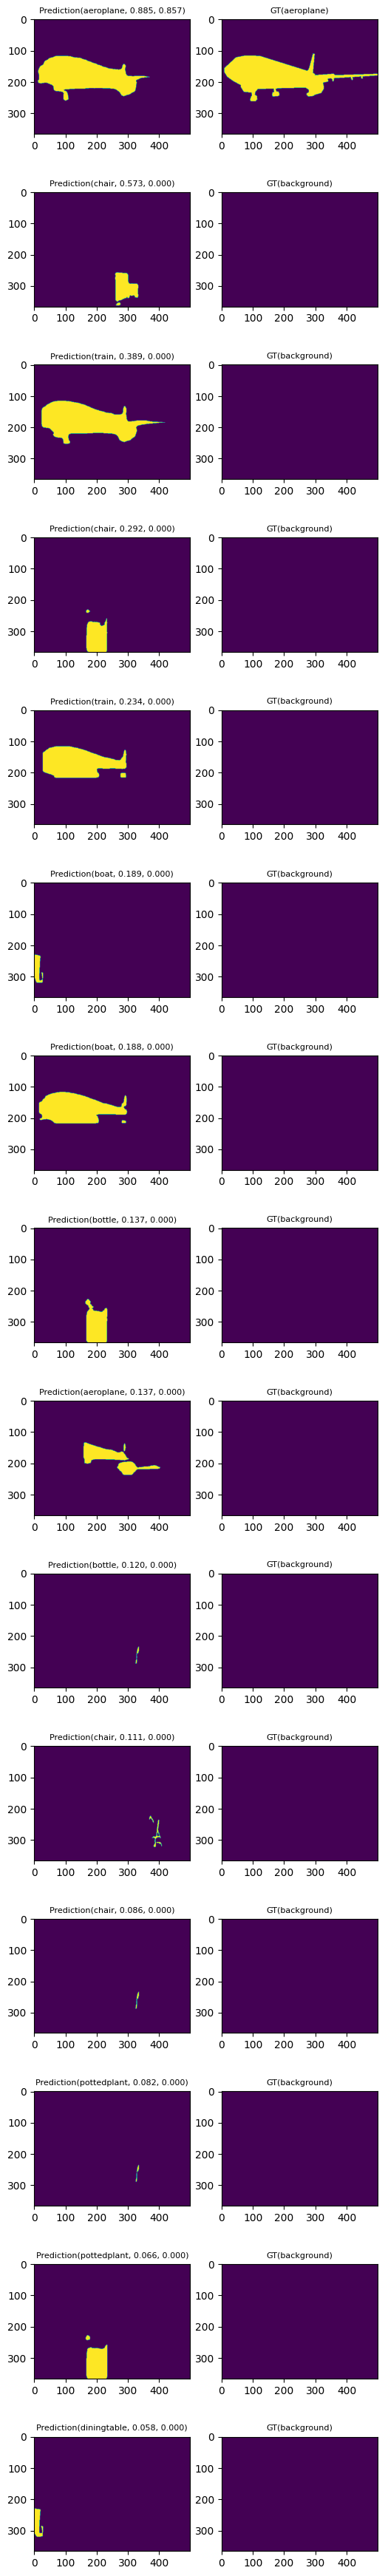

In [75]:
dataset = v_dataset
model = Task.get_model("./result/boundary(size=1)/checkpoint(30)")
sample = dataset[0]
plt.imshow(Converter.tensor_to_numpy_for_image(sample[0]))
Task.show_comparison_for_one_sample(model, sample, device, iou_threshold=0.5, mask_binary_threshold=0.5)

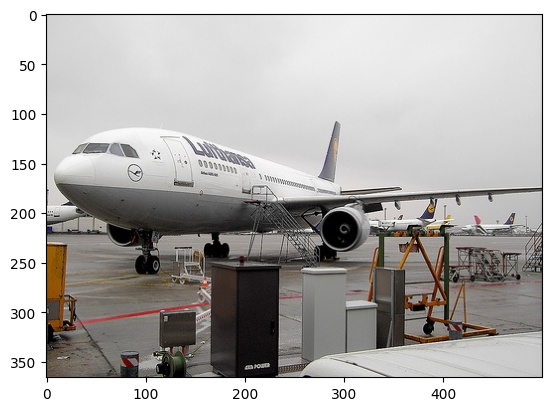

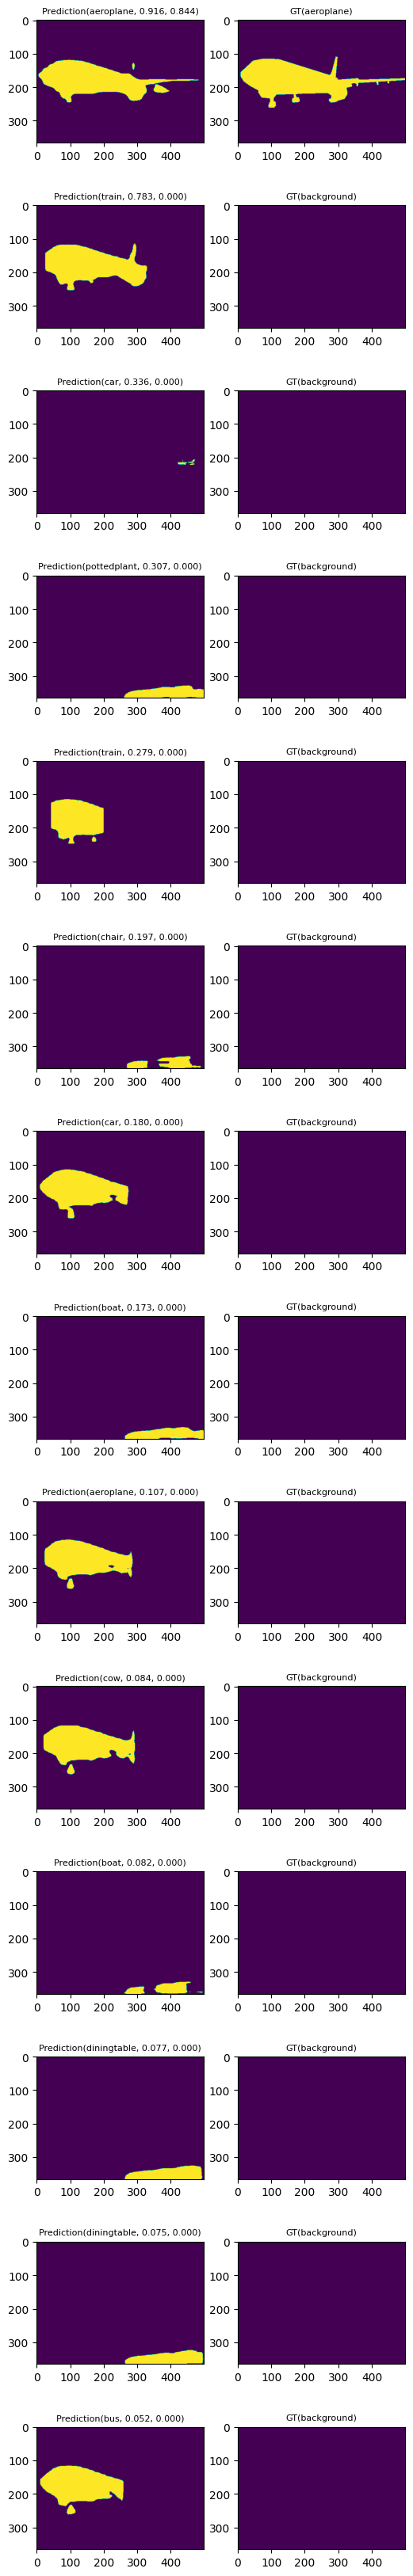

In [74]:
dataset = v_dataset
model = Task.get_model("./result/boundary(size=2)/checkpoint(30)")
sample = dataset[0]
plt.imshow(Converter.tensor_to_numpy_for_image(sample[0]))
Task.show_comparison_for_one_sample(model, sample, device, iou_threshold=0.5, mask_binary_threshold=0.5)

In [70]:
# for iou_threshold in [0.3, 0.5, 0.6]:
#     map = Task.map_eval(model, device, v_dataloader, iou_threshold = iou_threshold)
#     print(f"map({iou_threshold}): {map}")

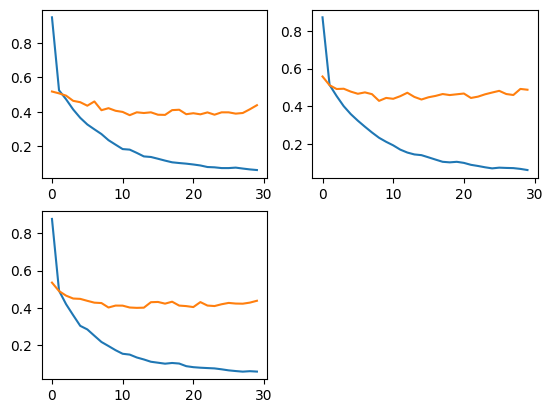

In [73]:
def loss_graph(path):
    with open(path, "rb") as file:
        loss_list = pickle.load(file)

    train_loss_list = loss_list["train_loss_list"]
    val_loss_list = loss_list["val_loss_list"]
    plt.plot(train_loss_list)
    plt.plot(val_loss_list)
    
plt.subplot(2, 2, 1) 
loss_graph("./result/benchmark/loss_dict.p")

plt.subplot(2, 2, 2) 
loss_graph("./result/boundary(size=1)/loss_dict.p")
plt.subplot(2, 2, 3) 
loss_graph("./result/boundary(size=2)/loss_dict.p")
# plt.subplot(2, 2, 4) 
# loss_graph("./result/boundary(size=3)/loss_dict.p")

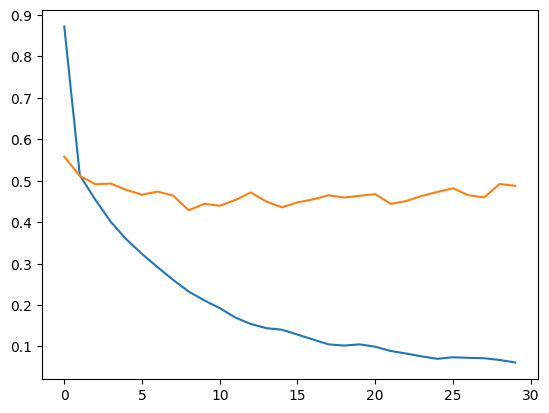

In [72]:
loss_graph("./result/boundary(size=1)/loss_dict.p")
loss_graph("./result/boundary(size=2)/loss_dict.p")
loss_graph("./result/boundary(size=3)/loss_dict.p")

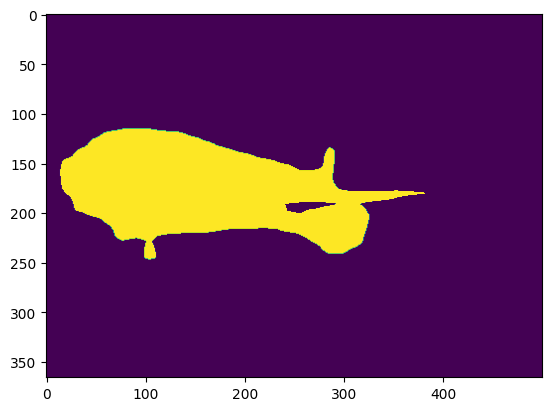

In [31]:
mask = result[0]["masks"][0].detach().numpy().squeeze()>0.5
plt.imshow(mask)

In [55]:
import torch

class DummyDataset(torch.utils.data.dataset.Dataset):
    def __len__(self):
        return 10
    
    def __getitem__(self, idx):
        return idx
    
dataset = DummyDataset()
torch.distributed.init_process_group("gloo", rank=0, world_size=1)
torch.utils.data.distributed.DistributedSampler(dataset)

In [63]:
torch.utils.data.distributed.RandomSampler(dataset)

AttributeError: module 'torch.utils.data.distributed' has no attribute 'RandomSampler'

In [ ]:
def nms(bboxes: torch.Tensor, scores: torch.Tensor, iou_threshold: float) -> torch.Tensor:
    order = torch.argsort(-scores)
    indices = torch.arange(bboxes.shape[0])
    keep = torch.ones_like(indices, dtype=torch.bool)
    for i in indices:
        if keep[i]:
            bbox = bboxes[order[i]]
            iou = box_iou(bbox[None,...],(bboxes[order[i + 1:]]) * keep[i + 1:][...,None])
            overlapped = torch.nonzero(iou > iou_threshold)
            keep[overlapped + i + 1] = 0
    return order[keep]

In [ ]:
def NMS(masks: torch.Tensor, scores: torch.Tensor, iou_threshold: float) -> torch.Tensor:
    order = torch.argsort(-scores)
    fix = []
    while 0 < len(order):
        fixed_idx = order[0]
        fix.append(fixed_mask)
        fix

In [78]:
x = torch.tensor([1, 2, 3])
torch.argsort(-x)


tensor([2, 1, 0])

In [86]:
[1, 2, 3][x[0]]

2